# NumPy Fundamentals

These documents clarify concepts, design decisions, and technical constraints in NumPy. This is a great place to understand the fundamental NumPy ideas and philosophy.

## 1. Array Creation

See also  
Array creation routines

**Introduction**

There are 6 general mechanisms for creating arrays:

1. Conversion from other Python structures (i.e. lists and tuples)

2. Intrinsic NumPy array creation functions (e.g. arange, ones, zeros, etc.)

3. Replicating, joining, or mutating existing arrays

4. Reading arrays from disk, either from standard or custom formats

5. Creating arrays from raw bytes through the use of strings or buffers

6. Use of special library functions (e.g., random)

You can use these methods to create ndarrays or Structured arrays. This document will cover general methods for ndarray creation.

### 1.1. Converting Python sequences to NumPy Arrays

NumPy arrays can be defined using Python sequences such as lists and tuples. Lists and tuples are defined using [...] and (...), respectively. Lists and tuples can define ndarray creation:

- a list of numbers will create a 1D array,
- a list of lists will create a 2D array,
- further nested lists will create higher-dimensional arrays. In general, any array object is called an ndarray in NumPy.

In [1]:
import numpy as np

In [3]:
a1D = np.array([1,2,3,4])
a2D = np.array([[1,2], [3,4]])
a3D = np.array([[[1,2], [3,4]], [[5,6], [7,8]]])

When you use numpy.array to define a new array, you should consider the dtype of the elements in the array, which can be specified explicitly. This feature gives you more control over the underlying data structures and how the elements are handled in C/C++ functions. If you are not careful with dtype assignments, you can get unwanted overflow, as such

In [4]:
a = np.array([127,128,129], dtype = np.int8)
a

C:\Users\Aliye\AppData\Local\Temp\ipykernel_15788\2453871658.py:1: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 128 to int8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)`
will give the desired result (the cast overflows).
  a = np.array([127,128,129], dtype = np.int8)
C:\Users\Aliye\AppData\Local\Temp\ipykernel_15788\2453871658.py:1: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 129 to int8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)`
will give the desired result (the cast overflows).
  a = np.array([127,128,129], dtype = np.int8)


array([ 127, -128, -127], dtype=int8)

An 8-bit signed integer represents integers from -128 to 127. Assigning the int8 array to integers outside of this range results in overflow. This feature can often be misunderstood. If you perform calculations with mismatching dtypes, you can get unwanted results, for example:

In [5]:
a = np.array([2,3,4], dtype = np.uint32)
b = np.array([5,6,7], dtype = np.uint32)
c_unsigned32 = a - b
print('unsigned c:', c_unsigned32, c_unsigned32.dtype)

unsigned c: [4294967293 4294967293 4294967293] uint32


In [6]:
c_signed32 = a - b.astype(np.int32)
print('signed c:', c_signed32, c_signed32.dtype)

signed c: [-3 -3 -3] int64


Notice when you perform operations with two arrays of the same dtype: uint32, the resulting array is the same type. When you perform operations with different dtype, NumPy will assign a new type that satisfies all of the array elements involved in the computation, here uint32 and int32 can both be represented in as int64.

The default NumPy behavior is to create arrays in either 32 or 64-bit signed integers (platform dependent and matches C long size) or double precision floating point numbers. If you expect your integer arrays to be a specific type, then you need to specify the dtype while you create the array.

### 1.2. Intrinsic NumPy array creation functions

NumPy has over 40 built-in functions for creating arrays as laid out in the Array creation routines. These functions can be split into roughly three categories, based on the dimension of the array they create:

1. 1D arrays
2. 2D arrays
3. ndarrays

**1D array creation functions**

The 1D array creation functions e.g. numpy.linspace and numpy.arange generally need at least two inputs, start and stop.

**numpy.arange** creates arrays with regularly incrementing values. Check the documentation for complete information and examples. A few examples are shown:

In [7]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
np.arange(2,10,dtype = float)

array([2., 3., 4., 5., 6., 7., 8., 9.])

In [9]:
np.arange(2,3,0.1)

array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9])

Note: best practice for numpy.arange is to use integer start, end, and step values. There are some subtleties regarding dtype. In the second example, the dtype is defined. In the third example, the array is dtype=float to accommodate the step size of 0.1. Due to roundoff error, the stop value is sometimes included.

numpy.linspace will create arrays with a specified number of elements, and spaced equally between the specified beginning and end values. For example:

In [10]:
np.linspace(1.,4.,6)

array([1. , 1.6, 2.2, 2.8, 3.4, 4. ])

The advantage of this creation function is that you guarantee the number of elements and the starting and end point. The previous arange(start, stop, step) will not include the value stop.

**2D array creation functions**

The 2D array creation functions e.g. numpy.eye, numpy.diag, and numpy.vander define properties of special matrices represented as 2D arrays.

np.eye(n, m) defines a 2D identity matrix. The elements where i=j (row index and column index are equal) are 1 and the rest are 0, as such:

In [11]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [12]:
np.eye(3,5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

**numpy.diag** can define either a square 2D array with given values along the diagonal or if given a 2D array returns a 1D array that is only the diagonal elements. The two array creation functions can be helpful while doing linear algebra, as such:

In [13]:
np.diag([1,2,3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [14]:
np.diag([1,2,3],1)

array([[0, 1, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3],
       [0, 0, 0, 0]])

In [15]:
a = np.array([[1,2],[3,4]])
np.diag(a)

array([1, 4])

vander(x, n) defines a Vandermonde matrix as a 2D NumPy array. Each column of the Vandermonde matrix is a decreasing power of the input 1D array or list or tuple, x where the highest polynomial order is n-1. This array creation routine is helpful in generating linear least squares models, as such:

In [16]:
np.vander(np.linspace(0,2,5), 2)

array([[0. , 1. ],
       [0.5, 1. ],
       [1. , 1. ],
       [1.5, 1. ],
       [2. , 1. ]])

In [17]:
np.vander([1,2,3,4], 2)

array([[1, 1],
       [2, 1],
       [3, 1],
       [4, 1]])

In [18]:
np.vander((1,2,3,4),4)

array([[ 1,  1,  1,  1],
       [ 8,  4,  2,  1],
       [27,  9,  3,  1],
       [64, 16,  4,  1]])

**general ndarray creation functions**

The ndarray creation functions e.g. numpy.ones, numpy.zeros, and random define arrays based upon the desired shape. The ndarray creation functions can create arrays with any dimension by specifying how many dimensions and length along that dimension in a tuple or list.

numpy.zeros will create an array filled with 0 values with the specified shape. The default dtype is float64:

In [19]:
np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [20]:
np.zeros((2,3,2))

array([[[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]]])

**numpy.ones** will create an array filled with 1 values. It is identical to zeros in all other respects as such:

In [21]:
np.ones((2,3))

array([[1., 1., 1.],
       [1., 1., 1.]])

In [22]:
np.ones((2,3,2))

array([[[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]]])

The random method of the result of default_rng will create an array filled with random values between 0 and 1. It is included with the numpy.random library. Below, two arrays are created with shapes (2,3) and (2,3,2), respectively. The seed is set to 42 so you can reproduce these pseudorandom numbers:

In [25]:
from numpy.random import default_rng
default_rng(42).random((2,3))

array([[0.77395605, 0.43887844, 0.85859792],
       [0.69736803, 0.09417735, 0.97562235]])

In [26]:
default_rng(42).random((2,3,2))

array([[[0.77395605, 0.43887844],
        [0.85859792, 0.69736803],
        [0.09417735, 0.97562235]],

       [[0.7611397 , 0.78606431],
        [0.12811363, 0.45038594],
        [0.37079802, 0.92676499]]])

numpy.indices will create a set of arrays (stacked as a one-higher dimensioned array), one per dimension with each representing variation in that dimension:

In [27]:
np.indices((3,3))

array([[[0, 0, 0],
        [1, 1, 1],
        [2, 2, 2]],

       [[0, 1, 2],
        [0, 1, 2],
        [0, 1, 2]]])

This is particularly useful for evaluating functions of multiple dimensions on a regular grid.

### 1.3. Replicating, joining, or mutating existing arrays

Once you have created arrays, you can replicate, join, or mutate those existing arrays to create new arrays. When you assign an array or its elements to a new variable, you have to explicitly numpy.copy the array, otherwise the variable is a view into the original array. Consider the following example:

In [28]:
a = np.array([1,2,3,4,5,6])
b = a[:2]
b +=1
print('a =', a, '; b =', b)

a = [2 3 3 4 5 6] ; b = [2 3]


In this example, you did not create a new array. You created a variable, b that viewed the first 2 elements of a. When you added 1 to b you would get the same result by adding 1 to a[:2]. If you want to create a new array, use the **numpy.copy** array creation routine as such:

In [29]:
a = np.array([1,2,3,4])
b = a[:2].copy()
b +=1
print('a = ', a, 'b = ', b)

a =  [1 2 3 4] b =  [2 3]


For more information and examples look at Copies and Views.

There are a number of routines to join existing arrays e.g. numpy.vstack, numpy.hstack, and numpy.block. Here is an example of joining four 2-by-2 arrays into a 4-by-4 array using block:

In [30]:
A = np.ones((2,2))
B = np.eye(2,2)
C = np.zeros((2,2))
D = np.diag((-3, -4))
np.block([[A,B], [C,D]])

array([[ 1.,  1.,  1.,  0.],
       [ 1.,  1.,  0.,  1.],
       [ 0.,  0., -3.,  0.],
       [ 0.,  0.,  0., -4.]])

Other routines use similar syntax to join ndarrays. Check the routine’s documentation for further examples and syntax.

### 1.4. Reading arrays from disk, either from standard or custom formats

This is the most common case of large array creation. The details depend greatly on the format of data on disk. This section gives general pointers on how to handle various formats. For more detailed examples of IO look at How to Read and Write files.

**Standard Binary Formats**

Various fields have standard formats for array data. The following lists the ones with known Python libraries to read them and return NumPy arrays (there may be others for which it is possible to read and convert to NumPy arrays so check the last section as well)

<code>
    HDF5: h5py
    FITS: Astropy
</code>

Examples of formats that cannot be read directly but for which it is not hard to convert are those formats supported by libraries like PIL (able to read and write many image formats such as jpg, png, etc).

**Common ASCII Formats**

Delimited files such as comma separated value (csv) and tab separated value (tsv) files are used for programs like Excel and LabView. Python functions can read and parse these files line-by-line. NumPy has two standard routines for importing a file with delimited data numpy.loadtxt and numpy.genfromtxt. These functions have more involved use cases in Reading and writing files. A simple example given a simple.csv:

<code>
    $ cat simple.csv
    x, y
    0, 0
    1, 1
    2, 4
    3, 9
</code>


Importing simple.csv is accomplished using numpy.loadtxt:

In [ ]:
np.loadtxt('simple.csv', delimiter=',', skiprows=1)

More generic ASCII files can be read using scipy.io and Pandas.

### 1.5. Use of special library functions (e.g., SciPy, Pandas, and OpenCV)

NumPy is the fundamental library for array containers in the Python Scientific Computing stack. Many Python libraries, including SciPy, Pandas, and OpenCV, use NumPy ndarrays as the common format for data exchange, These libraries can create, operate on, and work with NumPy arrays.

## 2. Indexing on ndarrays

See alse : Indexing routines

ndarrays can be indexed using the standard Python x[obj] syntax, where x is the array and obj the selection. There are different kinds of indexing available depending on obj: basic indexing, advanced indexing and field access.

Most of the following examples show the use of indexing when referencing data in an array. The examples work just as well when assigning to an array. See Assigning values to indexed arrays for specific examples and explanations on how assignments work.

Note that in Python, x[(exp1, exp2, ..., expN)] is equivalent to x[exp1, exp2, ..., expN]; the latter is just syntactic sugar for the former.

### 2.1. Basic Indexing

**Single element indexing**

Single element indexing works exactly like that for other standard Python sequences. It is 0-based, and accepts negative indices for indexing from the end of the array.

In [3]:
x = np.arange(10)
x[2]

2

In [4]:
x[-2]

8

It is not necessary to separate each dimension's index into its own set of square brackets.

In [5]:
x.shape=(2,5)     # now x is 2-dimensional
x[1,3]

8

In [6]:
x[1,-1]

9

Note that if one indexes a multidimensional array with fewer indices than dimensions, one gets a subdimensional array. For example:

In [7]:
x[0]

array([0, 1, 2, 3, 4])

That is, each index specified selects the array corresponding to the rest of the dimensions selected. In the above example, choosing 0 means that the remaining dimension of length 5 is being left unspecified, and that what is returned is an array of that dimensionality and size. It must be noted that the returned array is a view, i.e., it is not a copy of the original, but points to the same values in memory as does the original array. In this case, the 1-D array at the first position (0) is returned. So using a single index on the returned array, results in a single element being returned. That is:

In [8]:
x[0][2]

2

So note that x[0, 2] == x[0][2] though the second case is more inefficient as a new temporary array is created after the first index that is subsequently indexed by 2.

Note : NumPy uses C-order indexing. That means that the last index usually represents the most rapidly changing memory location, unlike Fortran or IDL, where the first index represents the most rapidly changing location in memory. This difference represents a great potential for confusion.

**Slicing and striding**

Basic slicing extends Python’s basic concept of slicing to N dimensions. Basic slicing occurs when obj is a slice object (constructed by start:stop:step notation inside of brackets), an integer, or a tuple of slice objects and integers. Ellipsis and newaxis objects can be interspersed with these as well.

The simplest case of indexing with N integers returns an array scalar representing the corresponding item. As in Python, all indices are zero-based: for the i-th index ni, the valid range is 0 <=ni<di where di is the i-th element of the shape of the array. Negative indices are interpreted as counting from the end of the array (i.e., if ni<0, it means ni+di).

All arrays generated by basic slicing are always views of the original array.

Note : NumPy slicing creates a view instead of a copy as in the case of built-in Python sequences such as string, tuple and list. Care must be taken when extracting a small portion from a large array which becomes useless after the extraction, because the small portion extracted contains a reference to the large original array whose memory will not be released until all arrays derived from it are garbage-collected. In such cases an explicit copy() is recommended.

The standard rules of sequence slicing apply to basic slicing on a per-dimension basis (including using a step index). Some useful concepts to remember include:

- The basic slice syntax is i:j:k where i is the starting index, j is the stopping index, and k is the step (k != 0). This selects the m elements (in the corresponding dimension) with index values i, i + k, …, i + (m - 1) k where m = q + (r !=0) and q and r are the quotient and remainder obtained by dividing j - i by k: j - i = q k + r, so that i + (m - 1) k < j. For example:

In [9]:
x = np.array([0,1,2,3,4,5,6,7,8,9])
x[1:7:2]

array([1, 3, 5])

- Negative i and j are interpreted as n + i and n + j where n is the number of elements in the corresponding dimension. Negative k makes stepping go towards smaller indices. From the above example:

In [10]:
x[-2:10]

array([8, 9])

In [11]:
x[-3:3:-1]

array([7, 6, 5, 4])

- Assume n is the number of elements in the dimension being sliced. Then, if i is not given it defaults to 0 for k > 0 and n - 1 for k < 0 . If j is not given it defaults to n for k > 0 and -n-1 for k < 0 . If k is not given it defaults to 1. Note that :: is the same as : and means select all indices along this axis. From the above example:

In [12]:
x[5:]

array([5, 6, 7, 8, 9])

- If the number of objects in the selection tuple is less than N, then : is assumed for any subsequent dimensions. For example:

In [3]:
x = np.array([[[1],[2],[3]], [[4],[5],[6]]])
x.shape

(2, 3, 1)

In [4]:
x[1:2]

array([[[4],
        [5],
        [6]]])

- An integer, i, returns the same values as i:i+1 except the dimensionality of the returned object is reduced by 1. In particular, a selection tuple with the p-th element an integer (and all other entries :) returns the corresponding sub-array with dimension N - 1. If N = 1 then the returned object is an array scalar. These objects are explained in Scalars.

- If the selection tuple has all entries : except the p-th entry which is a slice object i:j:k, then the returned array has dimension N formed by concatenating the sub-arrays returned by integer indexing of elements i, i+k, …, i + (m - 1) k < j,

- Basic slicing with more than one non-: entry in the slicing tuple, acts like repeated application of slicing using a single non-: entry, where the non-: entries are successively taken (with all other non-: entries replaced by :). Thus, x[ind1, ..., ind2,:] acts like x[ind1][..., ind2, :] under basic slicing.

Warning : The above is not true for advanced indexing.

- You may use slicing to set values in the array, but (unlike lists) you can never grow the array. The size of the value to be set in x[obj] = value must be (broadcastable to) the same shape as x[obj].

- A slicing tuple can always be constructed as obj and used in the x[obj] notation. Slice objects can be used in the construction in place of the [start:stop:step] notation. For example, x[1:10:5, ::-1] can also be implemented as obj = (slice(1, 10, 5), slice(None, None, -1)); x[obj] . This can be useful for constructing generic code that works on arrays of arbitrary dimensions. See Dealing with variable numbers of indices within programs for more information.

**Dimensional indexing tools**

There are some tools to facilitate the easy matching of array shapes with expressions and in assignments.

Ellipsis expands to the number of : objects needed for the selection tuple to index all dimensions. In most cases, this means that the length of the expanded selection tuple is x.ndim. There may only be a single ellipsis present. From the above example:

In [5]:
x[...,0]

array([[1, 2, 3],
       [4, 5, 6]])

In [7]:
# This is equivalent to:
x[:,:,0]

array([[1, 2, 3],
       [4, 5, 6]])

Each newaxis object in the selection tuple serves to expand the dimensions of the resulting selection by one unit-length dimension. The added dimension is the position of the newaxis object in the selection tuple. newaxis is an alias for None, and None can be used in place of this with the same result. From the above example:

In [8]:
x[:,np.newaxis, :, :].shape

(2, 1, 3, 1)

In [9]:
x[:,None,:,:].shape

(2, 1, 3, 1)

This can be handy to combine two arrays in a way that otherwise would require explicit reshaping operations. For example:

In [10]:
x = np.arange(5)
x[:,np.newaxis] + x[np.newaxis, :]

array([[0, 1, 2, 3, 4],
       [1, 2, 3, 4, 5],
       [2, 3, 4, 5, 6],
       [3, 4, 5, 6, 7],
       [4, 5, 6, 7, 8]])

### 2.2. Advanced indexing

Advanced indexing is triggered when the selection object, obj, is a non-tuple sequence object, an ndarray (of data type integer or bool), or a tuple with at least one sequence object or ndarray (of data type integer or bool). There are two types of advanced indexing: integer and Boolean.

Advanced indexing always returns a copy of the data (contrast with basic slicing that returns a view).

Warning : The definition of advanced indexing means that x[(1, 2, 3),] is fundamentally different than x[(1, 2, 3)]. The latter is equivalent to x[1, 2, 3] which will trigger basic selection while the former will trigger advanced indexing. Be sure to understand why this occurs.

**Integer array indexing**

Integer array indexing allows selection of arbitrary items in the array based on their N-dimensional index. Each integer array represents a number of indices into that dimension.

Negative values are permitted in the index arrays and work as they do with single indices or slices:

In [11]:
x = np.arange(10,1,-1)
x

array([10,  9,  8,  7,  6,  5,  4,  3,  2])

In [12]:
x[np.array([3,3,1,8])]

array([7, 7, 9, 2])

In [13]:
x[np.array([3,3,-3,8])]

array([7, 7, 4, 2])

In [14]:
# If the index values are out of bounds then an IndexError is thrown:
x = np.array([[1,2],[3,4],[5,6]])
x[np.array([1,-1])]

array([[3, 4],
       [5, 6]])

In [15]:
x[np.array([3,4])]

IndexError: index 3 is out of bounds for axis 0 with size 3

When the index consists of as many integer arrays as dimensions of the array being indexed, the indexing is straightforward, but different from slicing.

Advanced indices always are broadcast and iterated as one:

**result[i_1, ..., i_M] == x[ind_1[i_1, ..., i_M], ind_2[i_1, ..., i_M],
                           ..., ind_N[i_1, ..., i_M]]**
    
Note that the resulting shape is identical to the (broadcast) indexing array shapes ind_1, ..., ind_N. If the indices cannot be broadcast to the same shape, an exception IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes... is raised.

Indexing with multidimensional index arrays tend to be more unusual uses, but they are permitted, and they are useful for some problems. We’ll start with the simplest multidimensional case:

In [16]:
y = np.arange(35).reshape(5,7)
y

array([[ 0,  1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12, 13],
       [14, 15, 16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25, 26, 27],
       [28, 29, 30, 31, 32, 33, 34]])

In [17]:
y[np.array([0,2,4]), np.array([0,1,2])]

array([ 0, 15, 30])

In this case, if the index arrays have a matching shape, and there is an index array for each dimension of the array being indexed, the resultant array has the same shape as the index arrays, and the values correspond to the index set for each position in the index arrays. In this example, the first index value is 0 for both index arrays, and thus the first value of the resultant array is y[0, 0]. The next value is y[2, 1], and the last is y[4, 2].

If the index arrays do not have the same shape, there is an attempt to broadcast them to the same shape. If they cannot be broadcast to the same shape, an exception is raised:

In [18]:
y[np.array([0,2,4]), np.array([0,1])]

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (3,) (2,) 

The broadcasting mechanism permits index arrays to be combined with scalars for other indices. The effect is that the scalar value is used for all the corresponding values of the index arrays:

In [19]:
y[np.array([0,2,4]),1]

array([ 1, 15, 29])

Jumping to the next level of complexity, it is possible to only partially index an array with index arrays. It takes a bit of thought to understand what happens in such cases. For example if we just use one index array with y:

In [20]:
y[np.array([0,2,4])]

array([[ 0,  1,  2,  3,  4,  5,  6],
       [14, 15, 16, 17, 18, 19, 20],
       [28, 29, 30, 31, 32, 33, 34]])

It results in the construction of a new array where each value of the index array selects one row from the array being indexed and the resultant array has the resulting shape (number of index elements, size of row).

In general, the shape of the resultant array will be the concatenation of the shape of the index array (or the shape that all the index arrays were broadcast to) with the shape of any unused dimensions (those not indexed) in the array being indexed.

**Example**

From each row, a specific element should be selected. The row index is just [0, 1, 2] and the column index specifies the element to choose for the corresponding row, here [0, 1, 0]. Using both together the task can be solved using advanced indexing:

In [21]:
x = np.array([[1,2],[3,4],[5,6]])
x[[0,1,2], [0,1,0]]

array([1, 4, 5])

To achieve a behaviour similar to the basic slicing above, broadcasting can be used. The function ix_ can help with this broadcasting. This is best understood with an example.

**Example**

From a 4x3 array the corner elements should be selected using advanced indexing. Thus all elements for which the column is one of [0, 2] and the row is one of [0, 3] need to be selected. To use advanced indexing one needs to select all elements explicitly. Using the method explained previously one could write:

In [22]:
x = np.array([[ 0,  1,  2],
              [ 3,  4,  5],
              [ 6,  7,  8],
              [ 9, 10, 11]])
rows = np.array([[0,0],
                [3,3]], dtype = np.intp)

columns = np.array([[0,2],
                   [0,2]], dtype = np.intp)
x[rows, columns]

array([[ 0,  2],
       [ 9, 11]])

However, since the indexing arrays above just repeat themselves, broadcasting can be used (compare operations such as rows[:, np.newaxis] + columns) to simplify this:

In [23]:
rows = np.array([0,3], dtype = np.intp)
columns = np.array([0,2], dtype = np.intp)
rows[:,np.newaxis]

array([[0],
       [3]], dtype=int64)

In [24]:
x[rows[:,np.newaxis],columns]

array([[ 0,  2],
       [ 9, 11]])

This broadcasting can also be achieved using the function ix_:

In [25]:
x[np.ix_(rows, columns)]

array([[ 0,  2],
       [ 9, 11]])

Note that without the np.ix_ call, only the diagonal elements would be selected:

In [26]:
x[rows, columns]

array([ 0, 11])

This difference is the most important thing to remember about indexing with multiple advanced indices.

**Example**

A real-life example of where advanced indexing may be useful is for a color lookup table where we want to map the values of an image into RGB triples for display. The lookup table could have a shape (nlookup, 3). Indexing such an array with an image with shape (ny, nx) with dtype=np.uint8 (or any integer type so long as values are with the bounds of the lookup table) will result in an array of shape (ny, nx, 3) where a triple of RGB values is associated with each pixel location.

**Boolean array indexing**

This advanced indexing occurs when obj is an array object of Boolean type, such as may be returned from comparison operators. A single boolean index array is practically identical to x[obj.nonzero()] where, as described above, obj.nonzero() returns a tuple (of length obj.ndim) of integer index arrays showing the True elements of obj. However, it is faster when obj.shape == x.shape.

If obj.ndim == x.ndim, x[obj] returns a 1-dimensional array filled with the elements of x corresponding to the True values of obj. The search order will be row-major, C-style. An index error will be raised if the shape of obj does not match the corresponding dimensions of x, regardless of whether those values are True or False.

A common use case for this is filtering for desired element values. For example, one may wish to select all entries from an array which are not NaN:

In [27]:
x = np.array([[1.,2.], [np.nan, 3.], [np.nan, np.nan]])
x[~np.isnan(x)]

array([1., 2., 3.])

In [28]:
# Or wish to add a constant to all negative elements:
x = np.array([1.,-1.,-2.,3])
x[x<0] += 20
x

array([ 1., 19., 18.,  3.])

In general if an index includes a Boolean array, the result will be identical to inserting obj.nonzero() into the same position and using the integer array indexing mechanism described above. x[ind_1, boolean_array, ind_2] is equivalent to x[(ind_1,) + boolean_array.nonzero() + (ind_2,)].

If there is only one Boolean array and no integer indexing array present, this is straightforward. Care must only be taken to make sure that the boolean index has exactly as many dimensions as it is supposed to work with.

In general, when the boolean array has fewer dimensions than the array being indexed, this is equivalent to x[b, ...], which means x is indexed by b followed by as many : as are needed to fill out the rank of x. Thus the shape of the result is one dimension containing the number of True elements of the boolean array, followed by the remaining dimensions of the array being indexed:

In [29]:
x = np.arange(35).reshape(5,7)
b = x > 20
b[:,5]

array([False, False, False,  True,  True])

In [30]:
x[b[:,5]]

array([[21, 22, 23, 24, 25, 26, 27],
       [28, 29, 30, 31, 32, 33, 34]])

Here the 4th and 5th rows are selected from the indexed array and combined to make a 2-D array.

**Example**

From an array, select all rows which sum up to less or equal two:

In [31]:
x = np.array([[0,1],[1,1],[2,2]])
rowsum = x.sum(-1)
x[rowsum <=2, :]

array([[0, 1],
       [1, 1]])

Combining multiple Boolean indexing arrays or a Boolean with an integer indexing array can best be understood with the obj.nonzero() analogy. The function ix_ also supports boolean arrays and will work without any surprises.

**Example**

Use boolean indexing to select all rows adding up to an even number. At the same time columns 0 and 2 should be selected with an advanced integer index. Using the ix_ function this can be done with:

In [34]:
x = np.array([[ 0,  1,  2],
              [ 3,  4,  5],
              [ 6,  7,  8],
              [ 9, 10, 11]])
rows = (x.sum(-1)%2) == 0
rows

array([False,  True, False,  True])

In [35]:
columns = [0,2]
x[np.ix_(rows,columns)]

array([[ 3,  5],
       [ 9, 11]])

Without the np.ix_ call, only the diagonal elements would be selected.

Or without np.ix_ (compare the integer array examples):

In [36]:
rows = rows.nonzero()[0]
x[rows[:,np.newaxis],columns]

array([[ 3,  5],
       [ 9, 11]])

**Example**

Use a 2-D boolean array of shape (2, 3) with four True elements to select rows from a 3-D array of shape (2, 3, 5) results in a 2-D result of shape (4, 5):

In [38]:
x = np.arange(30).reshape(2,3,5)
x

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14]],

       [[15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29]]])

In [39]:
b = np.array([[True, True, True], [False, True, True]])
x[b]

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29]])

**Combining advanced and basic indexing**

When there is at least one slice (:), ellipsis (...) or newaxis in the index (or the array has more dimensions than there are advanced indices), then the behaviour can be more complicated. It is like concatenating the indexing result for each advanced index element.

In the simplest case, there is only a single advanced index combined with a slice. For example:

In [40]:
y = np.arange(35).reshape(5,7)
y[np.array([0,2,4]),1:3]

array([[ 1,  2],
       [15, 16],
       [29, 30]])

In effect, the slice and index array operation are independent. The slice operation extracts columns with index 1 and 2, (i.e. the 2nd and 3rd columns), followed by the index array operation which extracts rows with index 0, 2 and 4 (i.e the first, third and fifth rows). This is equivalent to:

In [41]:
y[:,1:3][np.array([0,2,4]),:]

array([[ 1,  2],
       [15, 16],
       [29, 30]])

A single advanced index can, for example, replace a slice and the result array will be the same. However, it is a copy and may have a different memory layout. A slice is preferable when it is possible. For example:

In [42]:
x = np.array([[ 0,  1,  2],
              [ 3,  4,  5],
              [ 6,  7,  8],
              [ 9, 10, 11]])
x[1:2, 1:3]

array([[4, 5]])

In [43]:
x[1:2,[1,2]]

array([[4, 5]])

The easiest way to understand a combination of multiple advanced indices may be to think in terms of the resulting shape. There are two parts to the indexing operation, the subspace defined by the basic indexing (excluding integers) and the subspace from the advanced indexing part. Two cases of index combination need to be distinguished:

- The advanced indices are separated by a slice, Ellipsis or newaxis. For example x[arr1, :, arr2].

- The advanced indices are all next to each other. For example x[..., arr1, arr2, :] but not x[arr1, :, 1] since 1 is an advanced index in this regard.

In the first case, the dimensions resulting from the advanced indexing operation come first in the result array, and the subspace dimensions after that. In the second case, the dimensions from the advanced indexing operations are inserted into the result array at the same spot as they were in the initial array (the latter logic is what makes simple advanced indexing behave just like slicing).

**Example**

Suppose x.shape is (10, 20, 30) and ind is a (2, 3, 4)-shaped indexing intp array, then result = x[..., ind, :] has shape (10, 2, 3, 4, 30) because the (20,)-shaped subspace has been replaced with a (2, 3, 4)-shaped broadcasted indexing subspace. If we let i, j, k loop over the (2, 3, 4)-shaped subspace then result[..., i, j, k, :] = x[..., ind[i, j, k], :]. This example produces the same result as x.take(ind, axis=-2).

**Example**

Let x.shape be (10, 20, 30, 40, 50) and suppose ind_1 and ind_2 can be broadcast to the shape (2, 3, 4). Then x[:, ind_1, ind_2] has shape (10, 2, 3, 4, 40, 50) because the (20, 30)-shaped subspace from X has been replaced with the (2, 3, 4) subspace from the indices. However, x[:, ind_1, :, ind_2] has shape (2, 3, 4, 10, 30, 50) because there is no unambiguous place to drop in the indexing subspace, thus it is tacked-on to the beginning. It is always possible to use .transpose() to move the subspace anywhere desired. Note that this example cannot be replicated using take.

**Example**

Slicing can be combined with broadcasted boolean indices:

In [44]:
x = np.arange(35).reshape(5,7)
b = x>20
b

array([[False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True]])

In [45]:
x[b[:,5],1:3]

array([[22, 23],
       [29, 30]])

### 2.3. Field access

See also : Structured arrays

If the ndarray object is a structured array the fields of the array can be accessed by indexing the array with strings, dictionary-like.

Indexing x['field-name'] returns a new view to the array, which is of the same shape as x (except when the field is a sub-array) but of data type x.dtype['field-name'] and contains only the part of the data in the specified field. Also, record array scalars can be “indexed” this way.

Indexing into a structured array can also be done with a list of field names, e.g. x[['field-name1', 'field-name2']]. As of NumPy 1.16, this returns a view containing only those fields. In older versions of NumPy, it returned a copy. See the user guide section on Structured arrays for more information on multifield indexing.

If the accessed field is a sub-array, the dimensions of the sub-array are appended to the shape of the result. For example:

In [46]:
x = np.zeros((2,2), dtype=[('a', np.int32), ('b', np.float64, (3,3))])
x['a'].shape

(2, 2)

In [47]:
x['a'].dtype

dtype('int32')

In [48]:
x['b'].shape

(2, 2, 3, 3)

In [49]:
x['b'].dtype

dtype('float64')

### 2.4. Flat Iterator indexing

x.flat returns an iterator that will iterate over the entire array (in C-contiguous style with the last index varying the fastest). This iterator object can also be indexed using basic slicing or advanced indexing as long as the selection object is not a tuple. This should be clear from the fact that x.flat is a 1-dimensional view. It can be used for integer indexing with 1-dimensional C-style-flat indices. The shape of any returned array is therefore the shape of the integer indexing object.

### 2.5. Assigning values to indexed arrays

As mentioned, one can select a subset of an array to assign to using a single index, slices, and index and mask arrays. The value being assigned to the indexed array must be shape consistent (the same shape or broadcastable to the shape the index produces). For example, it is permitted to assign a constant to a slice:

In [50]:
x = np.arange(10)
x[2:7] = 1

In [51]:
# or an array of the right size:
x[2:7] = np.arange(5)

Note that assignments may result in changes if assigning higher types to lower types (like floats to ints) or even exceptions (assigning complex to floats or ints):

In [52]:
x[1] = 1.2
x[1]

1

In [53]:
x[1] = 1.2j

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'complex'

Unlike some of the references (such as array and mask indices) assignments are always made to the original data in the array (indeed, nothing else would make sense!). Note though, that some actions may not work as one may naively expect. This particular example is often surprising to people:

In [54]:
x = np.arange(0,50,10)
x

array([ 0, 10, 20, 30, 40])

In [55]:
x[np.array([1,1,3,1])] +=1
x

array([ 0, 11, 20, 31, 40])

Where people expect that the 1st location will be incremented by 3. In fact, it will only be incremented by 1. The reason is that a new array is extracted from the original (as a temporary) containing the values at 1, 1, 3, 1, then the value 1 is added to the temporary, and then the temporary is assigned back to the original array. Thus the value of the array at x[1] + 1 is assigned to x[1] three times, rather than being incremented 3 times.

### 2.6. Dealing with variable numbers of indices within programs

The indexing syntax is very powerful but limiting when dealing with a variable number of indices. For example, if you want to write a function that can handle arguments with various numbers of dimensions without having to write special case code for each number of possible dimensions, how can that be done? If one supplies to the index a tuple, the tuple will be interpreted as a list of indices. For example:

In [56]:
z = np.arange(81).reshape(3,3,3,3)
indices = (1,1,1,1)
z[indices]

40

So one can use code to construct tuples of any number of indices and then use these within an index.

Slices can be specified within programs by using the slice() function in Python. For example:

In [57]:
indices = (1,1,1, slice(0,2))   # same as [1,1,1, 0:2]
z[indices]

array([39, 40])

In [59]:
# Likewise, ellipsis can be specified by code by using the Ellipsis object:
indices = (1, Ellipsis,1)   # same as [1, ..., 1]
z[indices]

array([[28, 31, 34],
       [37, 40, 43],
       [46, 49, 52]])

For this reason, it is possible to use the output from the np.nonzero() function directly as an index since it always returns a tuple of index arrays.

Because of the special treatment of tuples, they are not automatically converted to an array as a list would be. As an example:

In [60]:
z[[1,1,1,1]]   # produces a large array

array([[[[27, 28, 29],
         [30, 31, 32],
         [33, 34, 35]],

        [[36, 37, 38],
         [39, 40, 41],
         [42, 43, 44]],

        [[45, 46, 47],
         [48, 49, 50],
         [51, 52, 53]]],


       [[[27, 28, 29],
         [30, 31, 32],
         [33, 34, 35]],

        [[36, 37, 38],
         [39, 40, 41],
         [42, 43, 44]],

        [[45, 46, 47],
         [48, 49, 50],
         [51, 52, 53]]],


       [[[27, 28, 29],
         [30, 31, 32],
         [33, 34, 35]],

        [[36, 37, 38],
         [39, 40, 41],
         [42, 43, 44]],

        [[45, 46, 47],
         [48, 49, 50],
         [51, 52, 53]]],


       [[[27, 28, 29],
         [30, 31, 32],
         [33, 34, 35]],

        [[36, 37, 38],
         [39, 40, 41],
         [42, 43, 44]],

        [[45, 46, 47],
         [48, 49, 50],
         [51, 52, 53]]]])

In [61]:
z[(1,1,1,1)]    # returns a single value

40

### 2.7.  Detailed notes

These are some detailed notes, which are not of importance for day to day indexing (in no particular order):

- The native NumPy indexing type is intp and may differ from the default integer array type. intp is the smallest data type sufficient to safely index any array; for advanced indexing it may be faster than other types.
- For advanced assignments, there is in general no guarantee for the iteration order. This means that if an element is set more than once, it is not possible to predict the final result.
- An empty (tuple) index is a full scalar index into a zero-dimensional array. x[()] returns a scalar if x is zero-dimensional and a view otherwise. On the other hand, x[...] always returns a view.
- If a zero-dimensional array is present in the index and it is a full integer index the result will be a scalar and not a zero-dimensional array. (Advanced indexing is not triggered.)
- When an ellipsis (...) is present but has no size (i.e. replaces zero :) the result will still always be an array. A view if no advanced index is present, otherwise a copy.
- The nonzero equivalence for Boolean arrays does not hold for zero dimensional boolean arrays.
- When the result of an advanced indexing operation has no elements but an individual index is out of bounds, whether or not an IndexError is raised is undefined (e.g. x[[], [123]] with 123 being out of bounds).
- When a casting error occurs during assignment (for example updating a numerical array using a sequence of strings), the array being assigned to may end up in an unpredictable partially updated state. However, if any other error (such as an out of bounds index) occurs, the array will remain unchanged.
- The memory layout of an advanced indexing result is optimized for each indexing operation and no particular memory order can be assumed.
- When using a subclass (especially one which manipulates its shape), the default ndarray.__setitem__ behaviour will call __getitem__ for basic indexing but not for advanced indexing. For such a subclass it may be preferable to call ndarray.__setitem__ with a base class ndarray view on the data. This must be done if the subclasses __getitem__ does not return views.

## 3. I/O with NumPy

### 3.1. Importing data with genfromtxt

NumPy provides several functions to create arrays from tabular data. We focus here on the genfromtxt function.

In a nutshell, genfromtxt runs two main loops. The first loop converts each line of the file in a sequence of strings. The second loop converts each string to the appropriate data type. This mechanism is slower than a single loop, but gives more flexibility. In particular, genfromtxt is able to take missing data into account, when other faster and simpler functions like loadtxt cannot.

Note : When giving examples, we will use the following conventions:

In [1]:
import numpy as np
from io import StringIO

#### 3.1.1. Defining the input

The only mandatory argument of genfromtxt is the source of the data. It can be a string, a list of strings, a generator or an open file-like object with a read method, for example, a file or io.StringIO object. If a single string is provided, it is assumed to be the name of a local or remote file. If a list of strings or a generator returning strings is provided, each string is treated as one line in a file. When the URL of a remote file is passed, the file is automatically downloaded to the current directory and opened.

Recognized file types are text files and archives. Currently, the function recognizes gzip and bz2 (bzip2) archives. The type of the archive is determined from the extension of the file: if the filename ends with '.gz', a gzip archive is expected; if it ends with 'bz2', a bzip2 archive is assumed.

#### 3.1.2. Splitting the lines into columns

**The delimiter argument**

Once the file is defined and open for reading, genfromtxt splits each non-empty line into a sequence of strings. Empty or commented lines are just skipped. The delimiter keyword is used to define how the splitting should take place.

Quite often, a single character marks the separation between columns. For example, comma-separated files (CSV) use a comma (,) or a semicolon (;) as delimiter:

In [2]:
data = u"1, 2, 3\n4, 5, 6"
np.genfromtxt(StringIO(data), delimiter = ",")

array([[1., 2., 3.],
       [4., 5., 6.]])

Another common separator is "\t", the tabulation character. However, we are not limited to a single character, any string will do. By default, genfromtxt assumes delimiter=None, meaning that the line is split along white spaces (including tabs) and that consecutive white spaces are considered as a single white space.

Alternatively, we may be dealing with a fixed-width file, where columns are defined as a given number of characters. In that case, we need to set delimiter to a single integer (if all the columns have the same size) or to a sequence of integers (if columns can have different sizes):

In [7]:
data = u"  1  2  3\n  4  5 67\n890123  4"
np.genfromtxt(StringIO(data), delimiter = 3)

array([[  1.,   2.,   3.],
       [  4.,   5.,  67.],
       [890., 123.,   4.]])

In [8]:
data = u"123456789\n   4  7 9\n   4567 9"
np.genfromtxt(StringIO(data), delimiter = (4,3,2))

array([[1234.,  567.,   89.],
       [   4.,    7.,    9.],
       [   4.,  567.,    9.]])

**The autostrip argument**

By default, when a line is decomposed into a series of strings, the individual entries are not stripped of leading nor trailing white spaces. This behavior can be overwritten by setting the optional argument autostrip to a value of True:

In [11]:
data = u"1, abc , 2\n 3, xxx, 4"
# Without autostrip
np.genfromtxt(StringIO(data), delimiter=',', dtype = "|U5")

array([['1', ' abc ', ' 2'],
       ['3', ' xxx', ' 4']], dtype='<U5')

In [12]:
# With autostrip
np.genfromtxt(StringIO(data), delimiter = ",", dtype = "|U5", autostrip = True)

array([['1', 'abc', '2'],
       ['3', 'xxx', '4']], dtype='<U5')

**The comments argument**

The optional argument comments is used to define a character string that marks the beginning of a comment. By default, genfromtxt assumes comments='#'. The comment marker may occur anywhere on the line. Any character present after the comment marker(s) is simply ignored:

In [13]:
data = u"""#
# Skip me !
# Skip me too !
1, 2
3, 4
5, 6 #This is the third line of the data
7, 8
# And here comes the last line
9, 0
"""
np.genfromtxt(StringIO(data), comments="#", delimiter = ",")

array([[1., 2.],
       [3., 4.],
       [5., 6.],
       [7., 8.],
       [9., 0.]])

Note : New in version 1.7.0: When comments is set to None, no lines are treated as comments.

Note : here is one notable exception to this behavior: if the optional argument names=True, the first commented line will be examined for names.

#### 3.1.3. Skipping lines and choosing columns

**The skip_header and skip_footer arguments**

The presence of a header in the file can hinder data processing. In that case, we need to use the skip_header optional argument. The values of this argument must be an integer which corresponds to the number of lines to skip at the beginning of the file, before any other action is performed. Similarly, we can skip the last n lines of the file by using the skip_footer attribute and giving it a value of n:

In [14]:
data = u"\n".join(str(i) for i in range(10))
np.genfromtxt(StringIO(data),)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [15]:
np.genfromtxt(StringIO(data),
             skip_header = 3,
             skip_footer = 5)

array([3., 4.])

By default, skip_header=0 and skip_footer=0, meaning that no lines are skipped.

**The usecols argument**

In some cases, we are not interested in all the columns of the data but only a few of them. We can select which columns to import with the usecols argument. This argument accepts a single integer or a sequence of integers corresponding to the indices of the columns to import. Remember that by convention, the first column has an index of 0. Negative integers behave the same as regular Python negative indexes.

For example, if we want to import only the first and the last columns, we can use usecols=(0, -1):

In [17]:
data = u"1 2 3\n4 5 6"
np.genfromtxt(StringIO(data), usecols=(0,-1))

array([[1., 3.],
       [4., 6.]])

If the columns have names, we can also select which columns to import by giving their name to the usecols argument, either as a sequence of strings or a comma-separated string:

In [18]:
data = u"1 2 3\n4 5 6"
np.genfromtxt(StringIO(data),
             names = "a,b,c", usecols=("a","c"))

array([(1., 3.), (4., 6.)], dtype=[('a', '<f8'), ('c', '<f8')])

In [20]:
np.genfromtxt(StringIO(data),
             names="a,b,c", usecols=("a,c"))

array([(1., 3.), (4., 6.)], dtype=[('a', '<f8'), ('c', '<f8')])

#### 3.1.4. Choosing the data type

The main way to control how the sequences of strings we have read from the file are converted to other types is to set the dtype argument. Acceptable values for this argument are:

- a single type, such as dtype=float. The output will be 2D with the given dtype, unless a name has been associated with each column with the use of the names argument (see below). Note that dtype=float is the default for genfromtxt.
- a sequence of types, such as dtype=(int, float, float).
- a comma-separated string, such as dtype="i4,f8,|U3".
- a dictionary with two keys 'names' and 'formats'.
- a sequence of tuples (name, type), such as dtype=[('A', int), ('B', float)].
- an existing numpy.dtype object.
- the special value None. In that case, the type of the columns will be determined from the data itself (see below).

In all the cases but the first one, the output will be a 1D array with a structured dtype. This dtype has as many fields as items in the sequence. The field names are defined with the names keyword.

When dtype=None, the type of each column is determined iteratively from its data. We start by checking whether a string can be converted to a boolean (that is, if the string matches true or false in lower cases); then whether it can be converted to an integer, then to a float, then to a complex and eventually to a string.

The option dtype=None is provided for convenience. However, it is significantly slower than setting the dtype explicitly.

#### 3.1.5. Setting the names

**The names argument**

A natural approach when dealing with tabular data is to allocate a name to each column. A first possibility is to use an explicit structured dtype, as mentioned previously:

In [21]:
data = StringIO("1 2 3\n 4 5 6")
np.genfromtxt(data, dtype=[(_,int) for _ in "abc"])

array([(1, 2, 3), (4, 5, 6)],
      dtype=[('a', '<i4'), ('b', '<i4'), ('c', '<i4')])

Another simpler possibility is to use the names keyword with a sequence of strings or a comma-separated string:

In [22]:
data = StringIO("1 2 3\n 4 5 6")
np.genfromtxt(data, names = "A,B,C")

array([(1., 2., 3.), (4., 5., 6.)],
      dtype=[('A', '<f8'), ('B', '<f8'), ('C', '<f8')])

In the example above, we used the fact that by default, dtype=float. By giving a sequence of names, we are forcing the output to a structured dtype.

We may sometimes need to define the column names from the data itself. In that case, we must use the names keyword with a value of True. The names will then be read from the first line (after the skip_header ones), even if the line is commented out:

In [23]:
data = StringIO("So it goes\n#a b c\n1 2 3\n 4 5 6")
np.genfromtxt(data, skip_header=1, names = True)

array([(1., 2., 3.), (4., 5., 6.)],
      dtype=[('a', '<f8'), ('b', '<f8'), ('c', '<f8')])

The default value of names is None. If we give any other value to the keyword, the new names will overwrite the field names we may have defined with the dtype:

In [24]:
data = StringIO("1 2 3\n 4 5 6")
ndtype = [('a', int), ('b', float), ('c', int)]
names = ["A", "B", "C"]
np.genfromtxt(data, names = names, dtype = ndtype)

array([(1, 2., 3), (4, 5., 6)],
      dtype=[('A', '<i4'), ('B', '<f8'), ('C', '<i4')])

**The defaultfmt argument** 

If names=None but a structured dtype is expected, names are defined with the standard NumPy default of "f%i", yielding names like f0, f1 and so forth:

In [25]:
data = StringIO("1 2 3\n 4 5 6")
np.genfromtxt(data, dtype = (int,float,int))

array([(1, 2., 3), (4, 5., 6)],
      dtype=[('f0', '<i4'), ('f1', '<f8'), ('f2', '<i4')])

In the same way, if we don’t give enough names to match the length of the dtype, the missing names will be defined with this default template:

In [26]:
data = StringIO("1 2 3\n 4 5 6")
np.genfromtxt(data, dtype=(int,float,int), names = "a")

array([(1, 2., 3), (4, 5., 6)],
      dtype=[('a', '<i4'), ('f0', '<f8'), ('f1', '<i4')])

We can overwrite this default with the defaultfmt argument, that takes any format string:

In [27]:
data = StringIO("1 2 3\n 4 5 6")
np.genfromtxt(data, dtype=(int, float, int), defaultfmt="var_%02i")

array([(1, 2., 3), (4, 5., 6)],
      dtype=[('var_00', '<i4'), ('var_01', '<f8'), ('var_02', '<i4')])

Note : We need to keep in mind that defaultfmt is used only if some names are expected but not defined.

**Validating names**

NumPy arrays with a structured dtype can also be viewed as recarray, where a field can be accessed as if it were an attribute. For that reason, we may need to make sure that the field name doesn’t contain any space or invalid character, or that it does not correspond to the name of a standard attribute (like size or shape), which would confuse the interpreter. genfromtxt accepts three optional arguments that provide a finer control on the names:

**deletechars**
Gives a string combining all the characters that must be deleted from the name. By default, invalid characters are ~!@#$ %^& *()- +~\|] }[{' ;: /?.>,< .

**excludelist**
Gives a list of the names to exclude, such as return, file, print… If one of the input name is part of this list, an underscore character ('_') will be appended to it.

**case_sensitive**
Whether the names should be case-sensitive (case_sensitive=True), converted to upper case (case_sensitive=False or case_sensitive='upper') or to lower case (case_sensitive='lower').

#### 3.1.6. Tweaking the conversion

**The converters argument**

Usually, defining a dtype is sufficient to define how the sequence of strings must be converted. However, some additional control may sometimes be required. For example, we may want to make sure that a date in a format YYYY/MM/DD is converted to a datetime object, or that a string like xx% is properly converted to a float between 0 and 1. In such cases, we should define conversion functions with the converters arguments.

The value of this argument is typically a dictionary with column indices or column names as keys and a conversion functions as values. These conversion functions can either be actual functions or lambda functions. In any case, they should accept only a string as input and output only a single element of the wanted type.

In the following example, the second column is converted from as string representing a percentage to a float between 0 and 1:

In [28]:
convertfunc = lambda x: float(x.strip(b"%"))/100.
data = u"1, 2.3%, 45.\n6, 78.9%, 0"
names = ("i", "p", "n")
# General case .....
np.genfromtxt(StringIO(data), delimiter=",", names=names)

array([(1., nan, 45.), (6., nan,  0.)],
      dtype=[('i', '<f8'), ('p', '<f8'), ('n', '<f8')])

We need to keep in mind that by default, dtype=float. A float is therefore expected for the second column. However, the strings ' 2.3%' and ' 78.9%' cannot be converted to float and we end up having np.nan instead. Let’s now use a converter:

In [29]:
# Converted case ...
np.genfromtxt(StringIO(data), delimiter=",", names=names,
              converters={1: convertfunc})

array([(1., 0.023, 45.), (6., 0.789,  0.)],
      dtype=[('i', '<f8'), ('p', '<f8'), ('n', '<f8')])

The same results can be obtained by using the name of the second column ("p") as key instead of its index (1):

In [30]:
# Using a name for the converter ...
np.genfromtxt(StringIO(data), delimiter=",", names=names,
              converters={"p": convertfunc})

array([(1., 0.023, 45.), (6., 0.789,  0.)],
      dtype=[('i', '<f8'), ('p', '<f8'), ('n', '<f8')])

Converters can also be used to provide a default for missing entries. In the following example, the converter convert transforms a stripped string into the corresponding float or into -999 if the string is empty. We need to explicitly strip the string from white spaces as it is not done by default:

In [31]:
data = u"1, , 3\n 4, 5, 6"
convert = lambda x: float(x.strip() or -999)
np.genfromtxt(StringIO(data), delimiter=",",
              converters={1: convert})

array([[   1., -999.,    3.],
       [   4.,    5.,    6.]])

**Using missing and filling values**

Some entries may be missing in the dataset we are trying to import. In a previous example, we used a converter to transform an empty string into a float. However, user-defined converters may rapidly become cumbersome to manage.

The genfromtxt function provides two other complementary mechanisms: the missing_values argument is used to recognize missing data and a second argument, filling_values, is used to process these missing data.

**missing_values**
By default, any empty string is marked as missing. We can also consider more complex strings, such as "N/A" or "???" to represent missing or invalid data. The missing_values argument accepts three kinds of values:

*a string or a comma-separated string*
This string will be used as the marker for missing data for all the columns

*a sequence of strings*
In that case, each item is associated to a column, in order.

*a dictionary*
Values of the dictionary are strings or sequence of strings. The corresponding keys can be column indices (integers) or column names (strings). In addition, the special key None can be used to define a default applicable to all columns.

**filling_values**
We know how to recognize missing data, but we still need to provide a value for these missing entries. By default, this value is determined from the expected dtype according to this table:

|Expected type   |   Default|
|----------------|----------|
| bool            | False  |
|int| -1|
|float|np.nan|
|complex|np.nan+0j|
|string|'???'|

We can get a finer control on the conversion of missing values with the filling_values optional argument. Like missing_values, this argument accepts different kind of values:

*a single value*
This will be the default for all columns

*a sequence of values*
Each entry will be the default for the corresponding column

*a dictionary*
Each key can be a column index or a column name, and the corresponding value should be a single object. We can use the special key None to define a default for all columns.

In the following example, we suppose that the missing values are flagged with "N/A" in the first column and by "???" in the third column. We wish to transform these missing values to 0 if they occur in the first and second column, and to -999 if they occur in the last column:

In [32]:
data = u"N/A, 2, 3\n4, ,???"
kwargs = dict(delimiter=",",
              dtype=int,
              names="a,b,c",
              missing_values={0:"N/A", 'b':" ", 2:"???"},
              filling_values={0:0, 'b':0, 2:-999})
np.genfromtxt(StringIO(data), **kwargs)

array([(0, 2,    3), (4, 0, -999)],
      dtype=[('a', '<i4'), ('b', '<i4'), ('c', '<i4')])

**usemask**
We may also want to keep track of the occurrence of missing data by constructing a boolean mask, with True entries where data was missing and False otherwise. To do that, we just have to set the optional argument usemask to True (the default is False). The output array will then be a MaskedArray.

#### 3.1.7. Shortcut functions
In addition to genfromtxt, the numpy.lib.npyio module provides several convenience functions derived from genfromtxt. These functions work the same way as the original, but they have different default values.

**numpy.lib.npyio.recfromtxt**

Returns a standard numpy.recarray (if usemask=False) or a numpy.ma.mrecords.MaskedRecords array (if usemaske=True). The default dtype is dtype=None, meaning that the types of each column will be automatically determined.

**numpy.lib.npyio.recfromcsv**

Like numpy.lib.npyio.recfromtxt, but with a default delimiter=",".

## 4. DATA TYPES

See also : Data type objects

### 4.1. Array types and conversions between types

NumPy supports a much greater variety of numerical types than Python does. This section shows which are available, and how to modify an array’s data-type.

The primitive types supported are tied closely to those in C:

| Numpy type | C type | Description |
|------------|--------|-------------|
|numpy.bool_ |bool | Boolean (True or False) stored as a byte|
|numpy.byte| signed char | Platform-defined |
| numpy.ubyte| unsigned char | Platform-defined|
| numpy.short| short | Platform-defined|
|numpy.ushort|unsigned short|Platform-defined|
|numpy.intc|int|Platform-defined|
|numpy.uintc| unsigned int | Platform-defined|
|numpy.int_ |long | Platform-defined |
| numpy.uint | unsigned long | Platform-defined |
| numpy.longlong | long long | Platform-defined |
| numpy.ulonglong | unsigned long long | Platform-defined|
| numpy.half / numpy.float16 |    | Half precision float: sign bit, 5 bits exponent, 10 bits mantissa|
| numpy.single | float | Platform-defined single precision float: typically sign bit, 8 bits exponent, 23 bits mantissa |
|numpy.double | double |Platform-defined double precision float: typically sign bit, 11 bits exponent, 52 bits mantissa.|
| numpy.longdouble | long double | Platform-defined extended-precision float |
| numpy.csingle | float complex | Complex number, represented by two single-precision floats (real and imaginary components)|
| numpy.cdouble | double complex | Complex number, represented by two double-precision floats (real and imaginary components).|
| numpy.clongdouble | long double complex | Complex number, represented by two extended-precision floats (real and imaginary components).|

Since many of these have platform-dependent definitions, a set of fixed-size aliases are provided (See Sized aliases).

NumPy numerical types are instances of dtype (data-type) objects, each having unique characteristics. Once you have imported NumPy using >>> import numpy as np the dtypes are available as np.bool_, np.float32, etc.

Advanced types, not listed above, are explored in section Structured arrays.

There are 5 basic numerical types representing booleans (bool), integers (int), unsigned integers (uint) floating point (float) and complex. Those with numbers in their name indicate the bitsize of the type (i.e. how many bits are needed to represent a single value in memory). Some types, such as int and intp, have differing bitsizes, dependent on the platforms (e.g. 32-bit vs. 64-bit machines). This should be taken into account when interfacing with low-level code (such as C or Fortran) where the raw memory is addressed.

Data-types can be used as functions to convert python numbers to array scalars (see the array scalar section for an explanation), python sequences of numbers to arrays of that type, or as arguments to the dtype keyword that many numpy functions or methods accept. Some examples:

In [2]:
x = np.float32(1.0)
x

1.0

In [3]:
y = np.int_([1,2,4])
y

array([1, 2, 4])

In [4]:
z = np.arange(3, dtype = np.uint8)
z

array([0, 1, 2], dtype=uint8)

Array types can also be referred to by character codes, mostly to retain backward compatibility with older packages such as Numeric. Some documentation may still refer to these, for example:

In [5]:
np.array([1,2,3], dtype = 'f')

array([1., 2., 3.], dtype=float32)

We recommend using dtype objects instead.

To convert the type of an array, use the .astype() method (preferred) or the type itself as a function. For example:

In [6]:
z.astype(float)

array([0., 1., 2.])

In [7]:
np.int8(z)

array([0, 1, 2], dtype=int8)

Note that, above, we use the Python float object as a dtype. NumPy knows that int refers to np.int_, bool means np.bool_, that float is np.float_ and complex is np.complex_. The other data-types do not have Python equivalents.

To determine the type of an array, look at the dtype attribute:

In [8]:
z.dtype

dtype('uint8')

dtype objects also contain information about the type, such as its bit-width and its byte-order. The data type can also be used indirectly to query properties of the type, such as whether it is an integer:

In [9]:
d = np.dtype(int)
d

dtype('int32')

In [10]:
np.issubdtype(d, np.integer)

True

In [12]:
np.issubdtype(d, np.floating)

False

### 4.2. Array Scalars

NumPy generally returns elements of arrays as array scalars (a scalar with an associated dtype). Array scalars differ from Python scalars, but for the most part they can be used interchangeably (the primary exception is for versions of Python older than v2.x, where integer array scalars cannot act as indices for lists and tuples). There are some exceptions, such as when code requires very specific attributes of a scalar or when it checks specifically whether a value is a Python scalar. Generally, problems are easily fixed by explicitly converting array scalars to Python scalars, using the corresponding Python type function (e.g., int, float, complex, str, unicode).

The primary advantage of using array scalars is that they preserve the array type (Python may not have a matching scalar type available, e.g. int16). Therefore, the use of array scalars ensures identical behaviour between arrays and scalars, irrespective of whether the value is inside an array or not. NumPy scalars also have many of the same methods arrays do.

### 4.3. Overflow Errors

The fixed size of NumPy numeric types may cause overflow errors when a value requires more memory than available in the data type. For example, numpy.power evaluates 100 ** 8 correctly for 64-bit integers, but gives 1874919424 (incorrect) for a 32-bit integer.

In [13]:
np.power(100, 8, dtype = np.int64)

10000000000000000

In [14]:
np.power(100, 8, dtype = np.int32)

1874919424

The behaviour of NumPy and Python integer types differs significantly for integer overflows and may confuse users expecting NumPy integers to behave similar to Python’s int. Unlike NumPy, the size of Python’s int is flexible. This means Python integers may expand to accommodate any integer and will not overflow.

NumPy provides numpy.iinfo and numpy.finfo to verify the minimum or maximum values of NumPy integer and floating point values respectively

In [15]:
np.iinfo(int) # Bounds of the default integer on this system.

iinfo(min=-2147483648, max=2147483647, dtype=int32)

In [16]:
np.iinfo(np.int32)   # Bounds of a 32-bit integer

iinfo(min=-2147483648, max=2147483647, dtype=int32)

In [17]:
np.iinfo(np.int64)   # Bounds of a 64-bit integer

iinfo(min=-9223372036854775808, max=9223372036854775807, dtype=int64)

If 64-bit integers are still too small the result may be cast to a floating point number. Floating point numbers offer a larger, but inexact, range of possible values.

In [18]:
np.power(100, 100, dtype = np.int64)    # Incorrect even with 64-bit int

0

In [19]:
np.power(100, 100, dtype = np.float64)

1e+200

### 4.4. Extended Precision

Python’s floating-point numbers are usually 64-bit floating-point numbers, nearly equivalent to np.float64. In some unusual situations it may be useful to use floating-point numbers with more precision. Whether this is possible in numpy depends on the hardware and on the development environment: specifically, x86 machines provide hardware floating-point with 80-bit precision, and while most C compilers provide this as their long double type, MSVC (standard for Windows builds) makes long double identical to double (64 bits). NumPy makes the compiler’s long double available as np.longdouble (and np.clongdouble for the complex numbers). You can find out what your numpy provides with np.finfo(np.longdouble).

NumPy does not provide a dtype with more precision than C’s long double; in particular, the 128-bit IEEE quad precision data type (FORTRAN’s REAL*16) is not available.

For efficient memory alignment, np.longdouble is usually stored padded with zero bits, either to 96 or 128 bits. Which is more efficient depends on hardware and development environment; typically on 32-bit systems they are padded to 96 bits, while on 64-bit systems they are typically padded to 128 bits. np.longdouble is padded to the system default; np.float96 and np.float128 are provided for users who want specific padding. In spite of the names, np.float96 and np.float128 provide only as much precision as np.longdouble, that is, 80 bits on most x86 machines and 64 bits in standard Windows builds.

Be warned that even if np.longdouble offers more precision than python float, it is easy to lose that extra precision, since python often forces values to pass through float. For example, the % formatting operator requires its arguments to be converted to standard python types, and it is therefore impossible to preserve extended precision even if many decimal places are requested. It can be useful to test your code with the value 1 + np.finfo(np.longdouble).eps.

## 5. Broadcasting

See also : numpy.broadcast

The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations. Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes. Broadcasting provides a means of vectorizing array operations so that looping occurs in C instead of Python. It does this without making needless copies of data and usually leads to efficient algorithm implementations. There are, however, cases where broadcasting is a bad idea because it leads to inefficient use of memory that slows computation.

NumPy operations are usually done on pairs of arrays on an element-by-element basis. In the simplest case, the two arrays must have exactly the same shape, as in the following example:

In [21]:
a = np.array([1.0, 2.0, 3.0])
b = np.array([2.0, 2.0, 2.0])
a*b

array([2., 4., 6.])

NumPy’s broadcasting rule relaxes this constraint when the arrays’ shapes meet certain constraints. The simplest broadcasting example occurs when an array and a scalar value are combined in an operation:

In [22]:
a = np.array([1.0,2.0,3.0])
b = 2.0
a*b

array([2., 4., 6.])

The result is equivalent to the previous example where b was an array. We can think of the scalar b being stretched during the arithmetic operation into an array with the same shape as a. The new elements in b, as shown in Figure 1, are simply copies of the original scalar. The stretching analogy is only conceptual. NumPy is smart enough to use the original scalar value without actually making copies so that broadcasting operations are as memory and computationally efficient as possible.

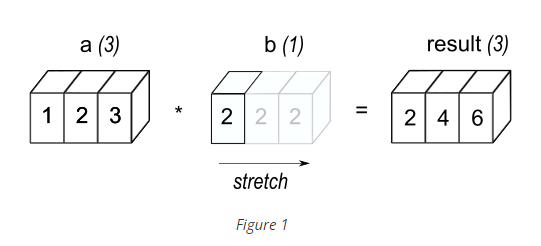

In the simplest example of broadcasting, the scalar b is stretched to become an array of same shape as a so the shapes are compatible for element-by-element multiplication.

The code in the second example is more efficient than that in the first because broadcasting moves less memory around during the multiplication (b is a scalar rather than an array).

### 5.2. General Broadcasting Rules

When operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing (i.e. rightmost) dimension and works its way left. Two dimensions are compatible when

1. they are equal, or
2. one of them is 1.

If these conditions are not met, a ValueError: operands could not be broadcast together exception is thrown, indicating that the arrays have incompatible shapes.

Input arrays do not need to have the same number of dimensions. The resulting array will have the same number of dimensions as the input array with the greatest number of dimensions, where the size of each dimension is the largest size of the corresponding dimension among the input arrays. Note that missing dimensions are assumed to have size one.

For example, if you have a 256x256x3 array of RGB values, and you want to scale each color in the image by a different value, you can multiply the image by a one-dimensional array with 3 values. Lining up the sizes of the trailing axes of these arrays according to the broadcast rules, shows that they are compatible:

- Image (3d array): 256 x 256 x 3
- Scale (1d array):             3
- Result(3d array): 256 x 256 x 3

When either of the dimensions compared is one, the other is used. In other words, dimensions with size 1 are stretched or “copied” to match the other.

In the following example, both the A and B arrays have axes with length one that are expanded to a larger size during the broadcast operation:

- A      (4d array): 8 x 1 x 6 x 1
- B      (3d array):     7 x 1 x 5
- Result (4d array): 8 x 7 x 6 x 5

### 5.3. Broadcastable arrays

A set of arrays is called “broadcastable” to the same shape if the above rules produce a valid result.

For example, if a.shape is (5,1), b.shape is (1,6), c.shape is (6,) and d.shape is () so that d is a scalar, then a, b, c, and d are all broadcastable to dimension (5,6); and

- a acts like a (5,6) array where a[:,0] is broadcast to the other columns,
- b acts like a (5,6) array where b[0,:] is broadcast to the other rows,
- c acts like a (1,6) array and therefore like a (5,6) array where c[:] is broadcast to every row, and finally,
- d acts like a (5,6) array where the single value is repeated.

Here are some more examples:

- A      (2d array):  5 x 4
- B      (1d array):      1
- Result (2d array):  5 x 4


- A      (2d array):  5 x 4
- B      (1d array):      4
- Result (2d array):  5 x 4


- A      (3d array):  15 x 3 x 5
- B      (3d array):  15 x 1 x 5
- Result (3d array):  15 x 3 x 5


- A      (3d array):  15 x 3 x 5
- B      (2d array):       3 x 5
- Result (3d array):  15 x 3 x 5


- A      (3d array):  15 x 3 x 5
- B      (2d array):       3 x 1
- Result (3d array):  15 x 3 x 5

Here are examples of shapes that do not broadcast:

- A      (1d array):  3
- B      (1d array):  4 # trailing dimensions do not match


- A      (2d array):      2 x 1
- B      (3d array):  8 x 4 x 3 # second from last dimensions mismatched

An example of broadcasting when a 1-d array is added to a 2-d array:

In [23]:
a = np.array([[ 0.0,  0.0,  0.0],
              [10.0, 10.0, 10.0],
              [20.0, 20.0, 20.0],
              [30.0, 30.0, 30.0]])
b = np.array([1.0, 2.0, 3.0])
a + b

array([[ 1.,  2.,  3.],
       [11., 12., 13.],
       [21., 22., 23.],
       [31., 32., 33.]])

In [24]:
b = np.array([1.0, 2.0, 3.0, 4.0])
a + b

ValueError: operands could not be broadcast together with shapes (4,3) (4,) 

As shown in Figure 2, b is added to each row of a. In Figure 3, an exception is raised because of the incompatible shapes.

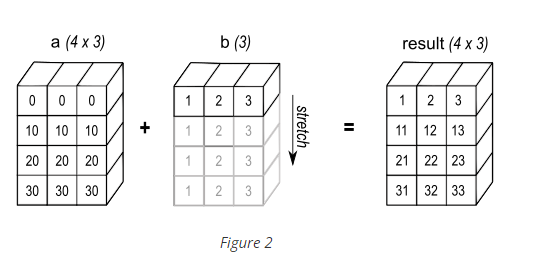

A one dimensional array added to a two dimensional array results in broadcasting if number of 1-d array elements matches the number of 2-d array columns.

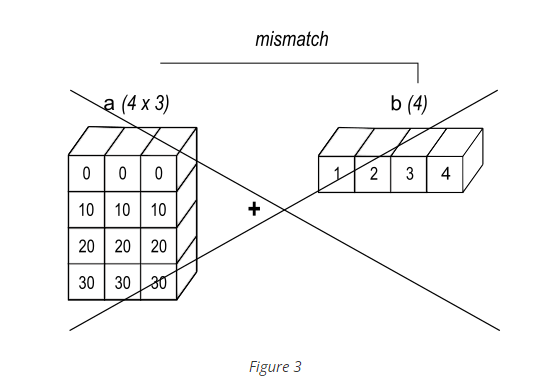

When the trailing dimensions of the arrays are unequal, broadcasting fails because it is impossible to align the values in the rows of the 1st array with the elements of the 2nd arrays for element-by-element addition.

Broadcasting provides a convenient way of taking the outer product (or any other outer operation) of two arrays. The following example shows an outer addition operation of two 1-d arrays:

In [25]:
a = np.array([0.0, 10.0, 20.0, 30.0])
b = np.array([1.0, 2.0, 3.0])
a[:, np.newaxis] + b

array([[ 1.,  2.,  3.],
       [11., 12., 13.],
       [21., 22., 23.],
       [31., 32., 33.]])

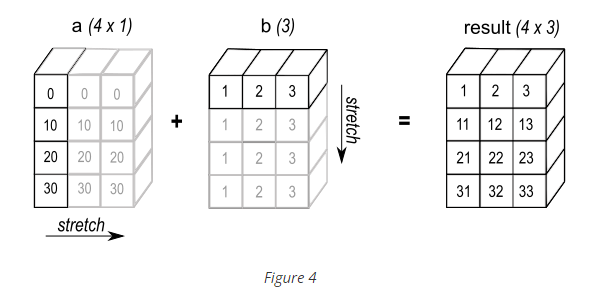

In some cases, broadcasting stretches both arrays to form an output array larger than either of the initial arrays.

Here the newaxis index operator inserts a new axis into a, making it a two-dimensional 4x1 array. Combining the 4x1 array with b, which has shape (3,), yields a 4x3 array.

### 5.4. A Practical Example: Vector Quantization

Broadcasting comes up quite often in real world problems. A typical example occurs in the vector quantization (VQ) algorithm used in information theory, classification, and other related areas. The basic operation in VQ finds the closest point in a set of points, called codes in VQ jargon, to a given point, called the observation. In the very simple, two-dimensional case shown below, the values in observation describe the weight and height of an athlete to be classified. The codes represent different classes of athletes. [1] Finding the closest point requires calculating the distance between observation and each of the codes. The shortest distance provides the best match. In this example, codes[0] is the closest class indicating that the athlete is likely a basketball player.

In [26]:
from numpy import array, argmin, sqrt, sum

In [27]:
observation = array([111.0, 188.0])
codes = array([[102.0, 203.0],
              [132.0, 193.0],
              [45.0, 155.0],
              [57.0, 173.0]])

diff = codes - observation   # the broadcast happens here
dist = sqrt(sum(diff**2, axis = -1))
argmin(dist)

0

In this example, the observation array is stretched to match the shape of the codes array:

- Observation      (1d array):      2
- Codes            (2d array):  4 x 2
- Diff             (2d array):  4 x 2


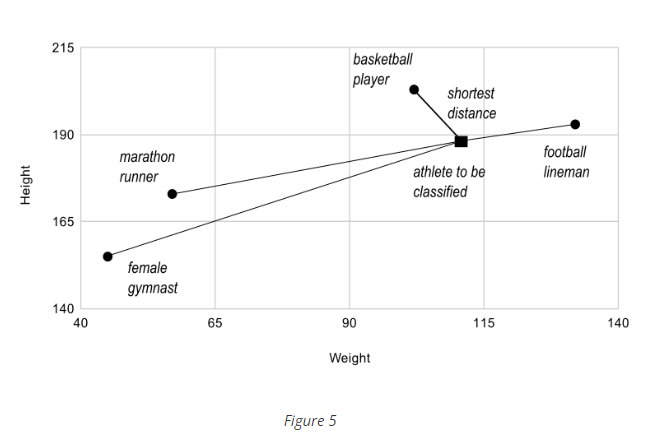

The basic operation of vector quantization calculates the distance between an object to be classified, the dark square, and multiple known codes, the gray circles. In this simple case, the codes represent individual classes. More complex cases use multiple codes per class.

Typically, a large number of observations, perhaps read from a database, are compared to a set of codes. Consider this scenario:

- Observation      (2d array):      10 x 3
- Codes            (3d array):   5 x 1 x 3
- Diff             (3d array):  5 x 10 x 3

The three-dimensional array, diff, is a consequence of broadcasting, not a necessity for the calculation. Large data sets will generate a large intermediate array that is computationally inefficient. Instead, if each observation is calculated individually using a Python loop around the code in the two-dimensional example above, a much smaller array is used.

Broadcasting is a powerful tool for writing short and usually intuitive code that does its computations very efficiently in C. However, there are cases when broadcasting uses unnecessarily large amounts of memory for a particular algorithm. In these cases, it is better to write the algorithm’s outer loop in Python. This may also produce more readable code, as algorithms that use broadcasting tend to become more difficult to interpret as the number of dimensions in the broadcast increases.

Footnotes

[1]
In this example, weight has more impact on the distance calculation than height because of the larger values. In practice, it is important to normalize the height and weight, often by their standard deviation across the data set, so that both have equal influence on the distance calculation.

## 6. Copies and Views

When operating on NumPy arrays, it is possible to access the internal data buffer directly using a view without copying data around. This ensures good performance but can also cause unwanted problems if the user is not aware of how this works. Hence, it is important to know the difference between these two terms and to know which operations return copies and which return views.

The NumPy array is a data structure consisting of two parts: the contiguous data buffer with the actual data elements and the metadata that contains information about the data buffer. The metadata includes data type, strides, and other important information that helps manipulate the ndarray easily. See the Internal organization of NumPy arrays section for a detailed look.

### 6.1. View

It is possible to access the array differently by just changing certain metadata like stride and dtype without changing the data buffer. This creates a new way of looking at the data and these new arrays are called views. The data buffer remains the same, so any changes made to a view reflects in the original copy. A view can be forced through the ndarray.view method.

### 6.2. Copy

When a new array is created by duplicating the data buffer as well as the metadata, it is called a copy. Changes made to the copy do not reflect on the original array. Making a copy is slower and memory-consuming but sometimes necessary. A copy can be forced by using ndarray.copy.

### 6.3. Indexing operations

See also : indexing on ndarrays

Views are created when elements can be addressed with offsets and strides in the original array. Hence, basic indexing always creates views. For example:

In [28]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [29]:
y = x[1:3]    # creates a view
y

array([1, 2])

In [30]:
x[1:3] = [10,11]
x

array([ 0, 10, 11,  3,  4,  5,  6,  7,  8,  9])

In [31]:
y

array([10, 11])

Here, y gets changed when x is changed because it is a view.

Advanced indexing, on the other hand, always creates copies. For example:

In [32]:
x = np.arange(9).reshape(3,3)
x

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [34]:
y = x[[1,2]]
y

array([[3, 4, 5],
       [6, 7, 8]])

In [35]:
y.base is None

True

Here, y is a copy, as signified by the base attribute. We can also confirm this by assigning new values to x[[1, 2]] which in turn will not affect y at all:

In [36]:
x[[1,2]] = [[10,11,12], [13,14,15]]
x

array([[ 0,  1,  2],
       [10, 11, 12],
       [13, 14, 15]])

In [37]:
y

array([[3, 4, 5],
       [6, 7, 8]])

It must be noted here that during the assignment of x[[1, 2]] no view or copy is created as the assignment happens in-place.

### 6.4. Other operations

The numpy.reshape function creates a view where possible or a copy otherwise. In most cases, the strides can be modified to reshape the array with a view. However, in some cases where the array becomes non-contiguous (perhaps after a ndarray.transpose operation), the reshaping cannot be done by modifying strides and requires a copy. In these cases, we can raise an error by assigning the new shape to the shape attribute of the array. For example:

In [38]:
x = np.ones((2,3))
y = x.T   # makes the array non-comtiguous
y

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [39]:
z = y.view()
z.shape = 6

AttributeError: Incompatible shape for in-place modification. Use `.reshape()` to make a copy with the desired shape.

Taking the example of another operation, ravel returns a contiguous flattened view of the array wherever possible. On the other hand, ndarray.flatten always returns a flattened copy of the array. However, to guarantee a view in most cases, x.reshape(-1) may be preferable.

### 6.5. How to tell if the array is a view or a copy

The base attribute of the ndarray makes it easy to tell if an array is a view or a copy. The base attribute of a view returns the original array while it returns None for a copy.

In [40]:
x = np.arange(9)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [41]:
y = x.reshape(3,3)
y

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [42]:
y.base    # .reshape() creates a view

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [43]:
z = y[[2,1]]
z

array([[6, 7, 8],
       [3, 4, 5]])

In [44]:
z.base is None    # advanced indexing creates a copy

True

Note that the base attribute should not be used to determine if an ndarray object is new; only if it is a view or a copy of another ndarray.